## Observations and Insights 

In [ ]:
#%matplotlib notebook

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Create a copy of the data frame
merge_df_copy = merge_df.copy()

In [4]:
# Checking the number of mice.
len(merge_df_copy["Mouse ID"].value_counts())

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
merge_df_copy[merge_df_copy.duplicated()]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [6]:
# Optional: Get all the data for the duplicate mouse ID.
merge_df_copy.loc[merge_df_copy["Mouse ID"]== "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

merge_df_copy = merge_df_copy.drop(merge_df.loc[merge_df["Mouse ID"]== "g989"].index)

In [8]:
# Checking the number of mice in the clean DataFrame.

len(merge_df_copy["Mouse ID"].value_counts())

248

## Summary Statistics

- Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
- Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
   - mean, median, variance, standard deviation, and SEM of the tumor volume. 
- Assemble the resulting series into a single summary dataframe.

In [9]:
# Group the data by drugs regimen
dregimen_groups = merge_df_copy.groupby("Drug Regimen")

In [10]:
# Mean tumor volume
mean_volume = dregimen_groups["Tumor Volume (mm3)"].mean()

In [11]:
# Median tumor volume
median_volume = dregimen_groups["Tumor Volume (mm3)"].median()

In [12]:
# Variance tumor volume
variance_volume = dregimen_groups["Tumor Volume (mm3)"].var()

In [13]:
# Standard deviation tumor volume
std_dev_volume = dregimen_groups["Tumor Volume (mm3)"].std()

In [14]:
# Standard error tumor volume
std_err_volume = dregimen_groups["Tumor Volume (mm3)"].sem()

In [15]:
# Create a data frame to store the information

summary_tumor_volume = pd.DataFrame({"Mean Tumor Volume": mean_volume,
                                    "Median Tumor Volume": median_volume,
                                    "Tumor Volume Variance": variance_volume,
                                    "Tumor Volume Std. Dev.": std_dev_volume,
                                    "Tumor Volume Std. Err": std_err_volume})
# Display the data frame
summary_tumor_volume

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


- Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [16]:
# Using the aggregation method, produce the same summary statistics in a single line

summary_volume = dregimen_groups["Tumor Volume (mm3)"].aggregate(['mean', 'median', 'var', 'std', 'sem'])
summary_volume

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

- Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

In [17]:
# Filter the DataFrame down only on to those columsn to chart
drug_groups = merge_df_copy.groupby("Drug Regimen")

In [18]:
# Create a variable to store the total number of unique mice tested on each drug regimen 
mousetotal_drug = drug_groups["Mouse ID"].count().sort_values(ascending=False)

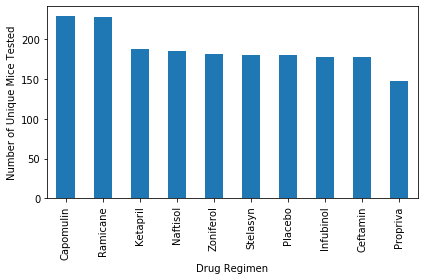

In [19]:
# Create the chart and customize it
drug_chart = mousetotal_drug.plot(kind = "bar")
plt.ylabel("Number of Unique Mice Tested")
plt.tight_layout()

- Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

In [20]:
# Create a range based on the number of drugs
x_axis = np.arange(len(merge_df_copy["Drug Regimen"].unique()))
tick_locations = [value for value in x_axis]

# Pull the drug names
drug_name= mousetotal_drug.index

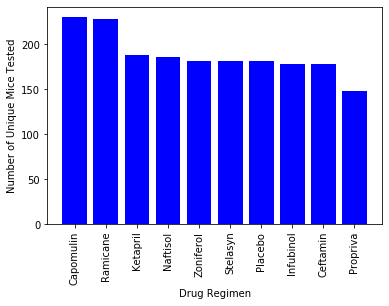

In [90]:
# Create the chart
plt.bar(x_axis, mousetotal_drug, color='b', align="center")
plt.xticks(tick_locations, drug_name, rotation="vertical" )
plt.ylabel("Number of Unique Mice Tested")
plt.xlabel("Drug Regimen")
plt.show()

- Generate a pie plot showing the distribution of female versus male mice using pandas

In [22]:
# Group the df by "Sex"
gender_group = merge_df_copy.groupby("Sex")

In [23]:
# Obtain the total items for each gender
gender_distribution = gender_group["Sex"].count().sort_values(ascending=False)

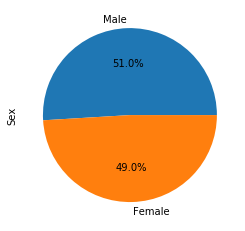

In [24]:
# Create the gender pie
gender_pie = gender_distribution.plot(kind="pie", autopct='%1.1f%%')

- Generate a pie plot showing the distribution of female versus male mice using pyplot

In [25]:
# Create the labels
labels = gender_distribution.index

Text(0, 0.5, 'Sex')

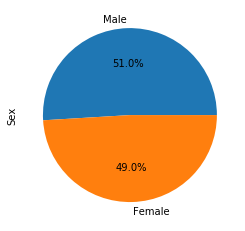

In [26]:
# Create the chart
plt.pie(gender_distribution, labels=labels, autopct="%1.1f%%")
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

* Calculate the final tumor volume of each mouse across four of the treatment regimens:  

   * Capomulin, Ramicane, Infubinol, and Ceftamin

In [27]:
merge_df_copy.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [28]:
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = pd.DataFrame(dregimen_groups["Timepoint"].max())

In [63]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_volume = pd.merge(merge_df_copy, max_timepoint, on="Timepoint", how="right")

# Obtain the data only for Capomulin, Ramicane, Infubinol, and Ceftamin

filter_merge_volume  = merge_volume.loc[(merge_volume["Drug Regimen"] == "Capomulin") | (merge_volume["Drug Regimen"] == "Ceftamin")| (merge_volume["Drug Regimen"] == "Infubinol") | (merge_volume["Drug Regimen"] == "Ramicane")]

# Clean the data frame 
filter_merge_volume = filter_merge_volume[["Drug Regimen", "Mouse ID", "Tumor Volume (mm3)"]]
#filter_merge_volume = filter_merge_volume.rename(columns = {"Tumor Volume (mm3)":"Final Tumor Volume (mm3)"})

In [64]:
nuevo  = merge_volume.loc[(merge_volume["Drug Regimen"] == "Capomulin") | (merge_volume["Drug Regimen"] == "Ceftamin")| (merge_volume["Drug Regimen"] == "Infubinol") | (merge_volume["Drug Regimen"] == "Ramicane")]

In [60]:
sample = pd.DataFrame(nuevo.groupby(['Drug Regimen', 'Mouse ID'])['Tumor Volume (mm3)'].mean()).reset_index()

In [65]:
filter_merge_volume

,Drug Regimen,Mouse ID,Tumor Volume (mm3)
0,Ramicane,k403,22.050126
1,Capomulin,s185,23.343598
2,Capomulin,x401,28.484033
3,Capomulin,m601,28.430964
4,Ramicane,g791,29.128472
...,...,...,...
1291,Ceftamin,x822,61.386660
1292,Infubinol,y163,67.685569
1295,Ceftamin,y769,68.594745
1296,Ceftamin,y865,64.729837


In [84]:
# Ramicane
ramicane_volume = filter_merge_volume['Tumor Volume (mm3)'].loc[filter_merge_volume["Drug Regimen"]=="Ramicane"]

In [85]:
ramicane_volume = filter_merge_volume['Tumor Volume (mm3)'].loc[filter_merge_volume["Drug Regimen"]=="Ramicane"]
quartiles = ramicane_volume.quantile([.25,.5,.75])
rlowerq = quartiles[0.25]
rupperq = quartiles[0.75]
riqr = rupperq - rlowerq
print(rlowerq)
print(rupperq)
print(riqr)

30.981175224999998
38.508305307499995
7.527130082499998


In [86]:
# Infubinol

infubinol_volume = filter_merge_volume['Tumor Volume (mm3)'].loc[(filter_merge_volume["Drug Regimen"] == "Infubinol")]
quartiles = infubinol_volume.quantile([.25,.5,.75])
ilowerq = quartiles[0.25]
iupperq = quartiles[0.75]
iiqr = iupperq - ilowerq
print(ilowerq)
print(iupperq)
print(iiqr)

62.75445141
67.68556862
4.9311172099999965


In [87]:
# Ceftamin
ceftamin_volume = filter_merge_volume['Tumor Volume (mm3)'].loc[(filter_merge_volume["Drug Regimen"] == "Ceftamin")]
quartiles = ceftamin_volume.quantile([.25,.5,.75])
clowerq = quartiles[0.25]
cupperq = quartiles[0.75]
ciqr = cupperq - clowerq
print(clowerq)
print(cupperq)
print(ciqr)

61.43389223
67.52748237
6.093590140000003


In [88]:
#Capomulin

capomulin_volume = filter_merge_volume['Tumor Volume (mm3)'].loc[filter_merge_volume["Drug Regimen"] == "Capomulin"]
quartiles = capomulin_volume.quantile([.25,.5,.75])
calowerq = quartiles[0.25]
caupperq = quartiles[0.75]
caiqr = caupperq - calowerq
print(calowerq)
print(caupperq)
print(caiqr)

32.37735684
40.1592203
7.781863460000004


In [89]:
# Boxplot

# Store the series values into a list 

capomulin_list = capomulin_volume.tolist()
ramicane_list = ramicane_volume.tolist()
infubinol_list = infubinol_volume.tolist()
ceftamin_list = ceftamin_volume.tolist()

# Store all the list in one list 

final_tumor_volume = [capomulin_list, ramicane_list, infubinol_list, ceftamin_list]

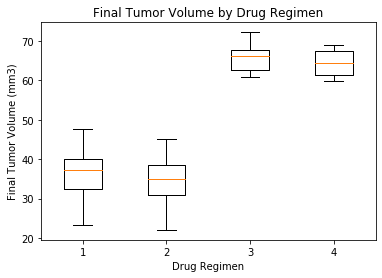

In [82]:
# BoxPlot

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume by Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(final_tumor_volume)
plt.show()

## Line and Scatter Plots

- Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

In [35]:
s185_records = merge_df_copy.loc[(merge_df_copy["Mouse ID"]== "s185") & (merge_df_copy["Drug Regimen"]== "Capomulin")]
s185_records

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


In [36]:
s185_timepoint = s185_records[["Timepoint", "Tumor Volume (mm3)"]]
s185_timepoint = s185_timepoint.set_index("Timepoint")

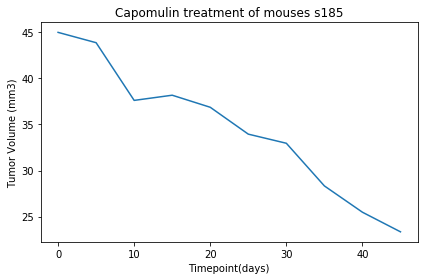

In [37]:
s185_chart = s185_timepoint.plot(kind="line", title = "Capomulin treatment of mouses s185", legend=False)
s185_chart.set_ylabel("Tumor Volume (mm3)")
s185_chart.set_xlabel("Timepoint(days)")
plt.tight_layout()

## Correlation and Regression

- Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

- Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

In [38]:
# Create a data frame with capomulin treatment information

capomulin_treatment = merge_df_copy.loc[merge_df_copy["Drug Regimen"]=="Capomulin"]
capomulin_treatment

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [39]:
# Group the data frame by Mouse ID
id_groups = capomulin_treatment.groupby("Mouse ID")

# Obtain the mean of the values
mean_capomulin = id_groups.mean()

Text(30.375, 0.5, 'Average Tumor Volume (mm3)')

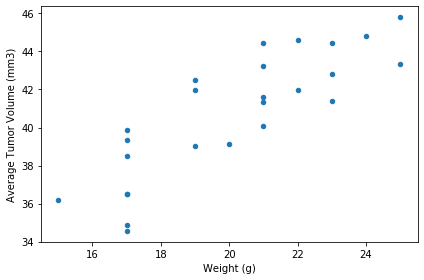

In [40]:
# Create the scatter plot

mean_scatter = mean_capomulin.plot(kind='scatter', x="Weight (g)", y="Tumor Volume (mm3)")
plt.tight_layout()
mean_scatter.set_ylabel("Average Tumor Volume (mm3)")


The correlation between both factors is 0.84


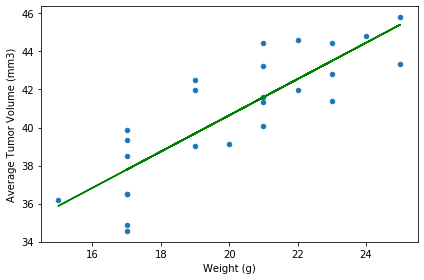

In [41]:
# Correlation
weight = mean_capomulin["Weight (g)"]
tumor_volume_mm3 = mean_capomulin["Tumor Volume (mm3)"]
correlation = st.pearsonr(weight , tumor_volume_mm3)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight , tumor_volume_mm3)
regression_values = weight * slope + intercept
mean_scatter = mean_capomulin.plot(kind='scatter', x="Weight (g)", y="Tumor Volume (mm3)")
plt.tight_layout()
mean_scatter.set_ylabel("Average Tumor Volume (mm3)")
mean_scatter.plot(weight, regression_values, "g-")